In [391]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Reading and cleaning data

In [392]:
df = pd.read_csv("data/coupons.csv")

<font color="blueviolet" face="Verdana" size="4">
- Replace Occupation  <br>
- Drop NA
</font>


In [393]:
df.replace(
    {"occupation": {"Education&Training&Library": "Education Training Library"}},
    inplace=True,
)

df = df.dropna(
    subset=[
        "Bar",
        "CoffeeHouse",
        "CarryAway",
        "RestaurantLessThan20",
        "Restaurant20To50",
    ],
    axis=0,
)

<font color="blueviolet" face="Verdana" size="4">
- Custom function to calculate percentage
</font>

In [394]:
def acceptance_percentage(grp, _len):
    grp["_pct"] = (grp["_sum"] / grp["_size"] * 100).round(2)
    grp["_pct_gnrl"] = (grp["_sum"] / _len * 100).round(2)
    return grp

# Restaurant \$20 to \$50 analysis

In [395]:
R2050 = df[(df.Restaurant20To50 != "never")]
R2050.shape

(10009, 26)

<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of expensive restaurant visit with different co passenger
</font>

In [396]:
R2050.groupby("passanger")[["passanger", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=R2050.shape[0]).sort_values(by="_pct_gnrl", ascending=False)

,_sum,_size,_pct,_pct_gnrl
passanger,,,,
Alone,3090,5710,54.12,30.87
Friend(s),1781,2609,68.26,17.79
Partner,537,881,60.95,5.37
Kid(s),399,809,49.32,3.99


<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of coupon acceptance with different Marital Status for Expensive Restaurant
</font>

In [397]:
R2050.groupby("maritalStatus")[["maritalStatus", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=R2050.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
)

,_sum,_size,_pct,_pct_gnrl
maritalStatus,,,,
Married partner,2359,4275,55.18,23.57
Single,2240,3577,62.62,22.38
Unmarried partner,931,1631,57.08,9.30
Divorced,226,418,54.07,2.26
Widowed,51,108,47.22,0.51


<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of coupon acceptance with presence of children while accepting Expensive Restaurant coupons
</font>

In [398]:
R2050.groupby("has_children")[["has_children", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=R2050.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
).rename(
    index={0: "No", 1: "Yes"}
)

,_sum,_size,_pct,_pct_gnrl
has_children,,,,
No,3543,5871,60.35,35.40
Yes,2264,4138,54.71,22.62


<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of coupon acceptance with varied Occupation for expensive Restaurant
</font>

In [399]:
(R2050.groupby("occupation").size() / R2050.shape[0] * 100).round(2).sort_values(
    ascending=False
).reset_index(name="percent").iloc[:10]

,occupation,percent
0,Unemployed,14.01
1,Student,11.88
2,Computer & Mathematical,11.69
3,Sales & Related,8.29
4,Education Training Library,7.88
5,Management,6.93
6,Office & Administrative Support,4.85
7,Business & Financial,4.28
8,Arts Design Entertainment Sports & Media,4.12
9,Retired,3.85


<font color="blueviolet" face="Verdana" size="4">
- (Joint probability) Marital status + Children to number co expensive restaurant coupons accepted
</font>

In [400]:
_R2050 = R2050[R2050.Y == 1]
_R2050 = (
    _R2050.groupby(["maritalStatus", "has_children"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)
_R2050

,maritalStatus,has_children,count
4,Single,0,2006
3,Married partner,1,1580
2,Married partner,0,779
6,Unmarried partner,0,730
5,Single,1,234
1,Divorced,1,214
7,Unmarried partner,1,201
9,Widowed,1,35
8,Widowed,0,16
0,Divorced,0,12


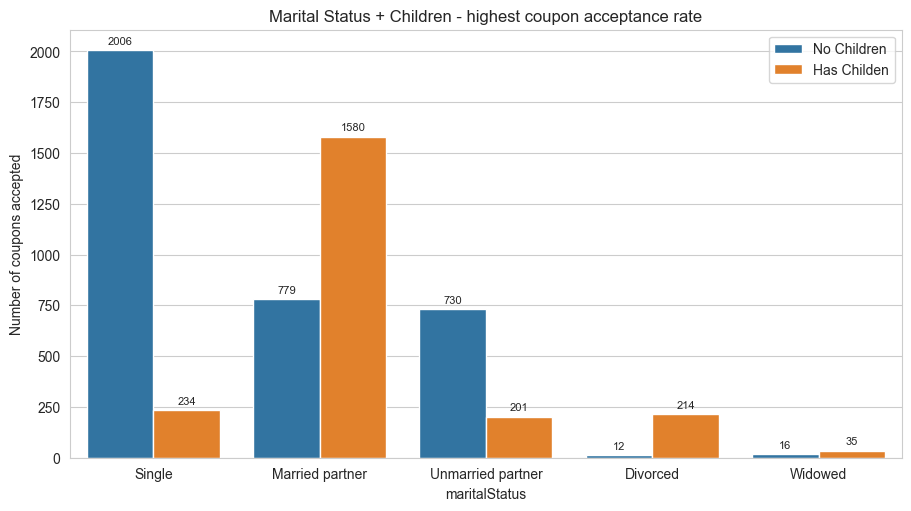

In [401]:
fig, ax = plt.subplots(layout="constrained", figsize=(9, 5))
_R2050.replace({0: "No Children", 1: "Has Childen"}, inplace=True)
rects = sns.barplot(_R2050, x="maritalStatus", y="count", hue="has_children")
ax.bar_label(rects.containers[0], padding=3, fontsize=8)
ax.bar_label(rects.containers[1], padding=3, fontsize=8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of coupons accepted")
ax.set_title("Marital Status + Children - highest coupon acceptance rate")

ax.legend().remove()
# Create a new legend with custom labels

ax.legend(loc="upper right", ncols=1)
plt.savefig("output/restaurant20_50_maritalstatus.png")
plt.show()

# Restaurant less than \$20 analysis

In [402]:
Rlt20 = df[(df.RestaurantLessThan20 != "never")]
Rlt20.shape

(11903, 26)

<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of economic restaurant visit with different co passenger
</font>

In [403]:
Rlt20.groupby("passanger")[["passanger", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=Rlt20.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
)

,_sum,_size,_pct,_pct_gnrl
passanger,,,,
Alone,3615,6858,52.71,30.37
Friend(s),2093,3101,67.49,17.58
Partner,603,1012,59.58,5.07
Kid(s),463,932,49.68,3.89


<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of economic restaurant visit with marital status
</font>

In [404]:
Rlt20.groupby("maritalStatus")[["passanger", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=Rlt20.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
)

,_sum,_size,_pct,_pct_gnrl
maritalStatus,,,,
Single,2735,4478,61.08,22.98
Married partner,2613,4809,54.34,21.95
Unmarried partner,1110,2004,55.39,9.33
Divorced,265,504,52.58,2.23
Widowed,51,108,47.22,0.43


<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of economic restaurant visit with presence of children
</font>

In [405]:
Rlt20.groupby("has_children")[["passanger", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=Rlt20.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
)

,_sum,_size,_pct,_pct_gnrl
has_children,,,,
0,4141,7035,58.86,34.79
1,2633,4868,54.09,22.12


<font color="blueviolet" face="Verdana" size="4">
- Joint Disibution of Marital Status and Children<br>
- Check the distribution of economic restaurant visit with Joint distribution
</font>

In [406]:
_Rlt20 = Rlt20[Rlt20.Y == 1]
_Rlt20 = (
    _Rlt20.groupby(["maritalStatus", "has_children"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)
_Rlt20

,maritalStatus,has_children,count
4,Single,0,2427
3,Married partner,1,1804
6,Unmarried partner,0,868
2,Married partner,0,809
5,Single,1,308
1,Divorced,1,244
7,Unmarried partner,1,242
9,Widowed,1,35
0,Divorced,0,21
8,Widowed,0,16


<font color="blueviolet" face="Verdana" size="4">
- Plot the join distribution of MaritalStatus+Children to see the range of coupons accepted
</font>

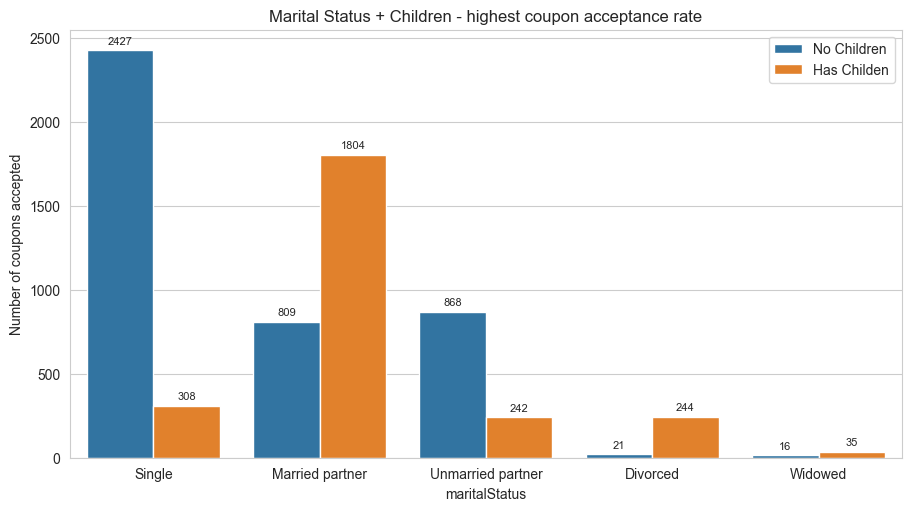

In [407]:
fig, ax = plt.subplots(layout="constrained", figsize=(9, 5))
_Rlt20.replace({0: "No Children", 1: "Has Childen"}, inplace=True)
rects = sns.barplot(_Rlt20, x="maritalStatus", y="count", hue="has_children")
ax.bar_label(rects.containers[0], padding=3, fontsize=8)
ax.bar_label(rects.containers[1], padding=3, fontsize=8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of coupons accepted")
ax.set_title("Marital Status + Children - highest coupon acceptance rate")

ax.legend().remove()
# Create a new legend with custom labels

ax.legend(loc="upper right", ncols=1)
plt.savefig("output/restaurant_lt_20_maritalstatus.png")
plt.show()

# CoffeeHouse Analysis

In [408]:
cafe = df[(df.CoffeeHouse != "never")]
cafe.shape

(9227, 26)

<font color="blueviolet" face="Verdana" size="4">
- Check the influence of different types of co-passanger have on Acceptance of CoffeeHouse Coupons
</font>

In [409]:
cafe.groupby("passanger")[["passanger", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=cafe.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
)

,_sum,_size,_pct,_pct_gnrl
passanger,,,,
Alone,2961,5286,56.02,32.09
Friend(s),1736,2424,71.62,18.81
Partner,494,783,63.09,5.35
Kid(s),388,734,52.86,4.21


<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of Marital Status visit with on Coupon acceptance at CoffeeHouse
</font>

In [410]:
cafe.groupby("maritalStatus")[["passanger", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=cafe.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
)

,_sum,_size,_pct,_pct_gnrl
maritalStatus,,,,
Single,2241,3426,65.41,24.29
Married partner,2143,3710,57.76,23.23
Unmarried partner,940,1631,57.63,10.19
Divorced,231,416,55.53,2.50
Widowed,24,44,54.55,0.26


<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of CoffeeHouse visit with presence of children
</font>

In [411]:
cafe.groupby("has_children")[["passanger", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=cafe.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
).rename(
    index={0: "No", 1: "Yes"}
)

,_sum,_size,_pct,_pct_gnrl
has_children,,,,
No,3375,5389,62.63,36.58
Yes,2204,3838,57.43,23.89


<font color="blueviolet" face="Verdana" size="4">
- Joint Disibution of Marital Status and Children<br>
- Check the distribution of Cafe House
</font>

In [412]:
_cafe = cafe[cafe.Y == 1]
_cafe = (
    _cafe.groupby(["maritalStatus", "has_children"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)
_cafe

,maritalStatus,has_children,count
4,Single,0,1966
3,Married partner,1,1495
6,Unmarried partner,0,749
2,Married partner,0,648
5,Single,1,275
1,Divorced,1,219
7,Unmarried partner,1,191
8,Widowed,1,24
0,Divorced,0,12


<font color="blueviolet" face="Verdana" size="4">
- Plot the join distribution of MaritalStatus+Children to see the range of coupons accepted
</font>

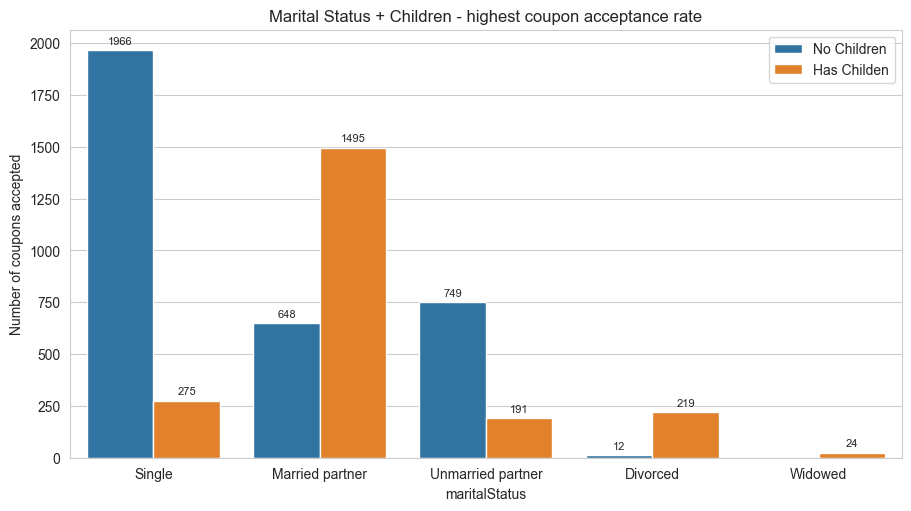

In [413]:
fig, ax = plt.subplots(layout="constrained", figsize=(9, 5))
_cafe.replace({0: "No Children", 1: "Has Childen"}, inplace=True)
rects = sns.barplot(_cafe, x="maritalStatus", y="count", hue="has_children")
ax.bar_label(rects.containers[0], padding=3, fontsize=8)
ax.bar_label(rects.containers[1], padding=3, fontsize=8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of coupons accepted")
ax.set_title("Marital Status + Children - highest coupon acceptance rate")

ax.legend().remove()
# Create a new legend with custom labels

ax.legend(loc="upper right", ncols=1)
plt.savefig("output/coffee_house_maritalstatus.png")
plt.show()

# Carry Out and Take Away Analysis

In [414]:
togo = df[(df.CarryAway != "never")]
togo.shape

(11948, 26)

<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of co passanger on ToGOs
</font>

In [415]:
togo.groupby("passanger")[["passanger", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=togo.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
)

,_sum,_size,_pct,_pct_gnrl
passanger,,,,
Alone,3631,6893,52.68,30.39
Friend(s),2111,3116,67.75,17.67
Partner,600,1010,59.41,5.02
Kid(s),463,929,49.84,3.88


<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of CarryOuts visit with varied Marital Status
</font>

In [416]:
togo.groupby("maritalStatus")[["passanger", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=togo.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
)

,_sum,_size,_pct,_pct_gnrl
maritalStatus,,,,
Single,2757,4522,60.97,23.07
Married partner,2594,4766,54.43,21.71
Unmarried partner,1138,2048,55.57,9.52
Divorced,265,504,52.58,2.22
Widowed,51,108,47.22,0.43


<font color="blueviolet" face="Verdana" size="4">
- Check the distribution of Children's presence on CarryOut Coupon acceptance 
</font>

In [417]:
togo.groupby("has_children")[["passanger", "Y"]].agg(
    _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
    _size=pd.NamedAgg(column="Y", aggfunc="size"),
).pipe(acceptance_percentage, _len=togo.shape[0]).sort_values(
    by="_pct_gnrl", ascending=False
).rename(
    index={0: "No", 1: "Yes"}
)

,_sum,_size,_pct,_pct_gnrl
has_children,,,,
No,4178,7101,58.84,34.97
Yes,2627,4847,54.20,21.99


<font color="blueviolet" face="Verdana" size="4">
- Joint Disibution of Marital Status and Children<br>
- Check the distribution of Carry Away visit with joint distribution
</font>

In [418]:
_togo = togo[togo.Y == 1]
_togo = (
    _togo.groupby(["maritalStatus", "has_children"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)
_togo

,maritalStatus,has_children,count
4,Single,0,2436
3,Married partner,1,1785
6,Unmarried partner,0,896
2,Married partner,0,809
5,Single,1,321
1,Divorced,1,244
7,Unmarried partner,1,242
9,Widowed,1,35
0,Divorced,0,21
8,Widowed,0,16


<font color="blueviolet" face="Verdana" size="4">
- Plot the join distribution of MaritalStatus+Children to see the range of coupons accepted
</font>

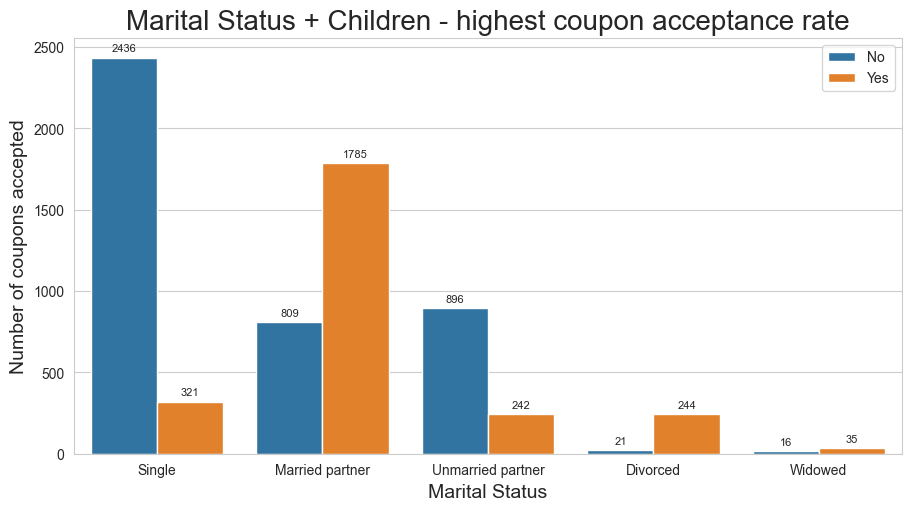

In [419]:
fig, ax = plt.subplots(layout="constrained", figsize=(9, 5))
_cafe.replace({0: "No Children", 1: "Has Childen"}, inplace=True)
rects = sns.barplot(
    _togo.replace({"has_children": {0: "No", 1: "Yes"}}),
    x="maritalStatus",
    y="count",
    hue="has_children",
)
ax.bar_label(rects.containers[0], padding=3, fontsize=8)
ax.bar_label(rects.containers[1], padding=3, fontsize=8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Marital Status", fontsize=14)
ax.set_ylabel("Number of coupons accepted", fontsize=14)
ax.set_title("Marital Status + Children - highest coupon acceptance rate", fontsize=20)

ax.legend().remove()
# Create a new legend with custom labels

ax.legend(loc="upper right", ncols=1)
plt.savefig("output/carry_away_maritalstatus.png")
plt.show()

# Consolidate all Graph of all 5 (Bar, Coffee House, Carry Away, both Restaurant) with income and freuency of visit.
- This will help us compare the changes on trend of different income having on
   - Frequency of Visit

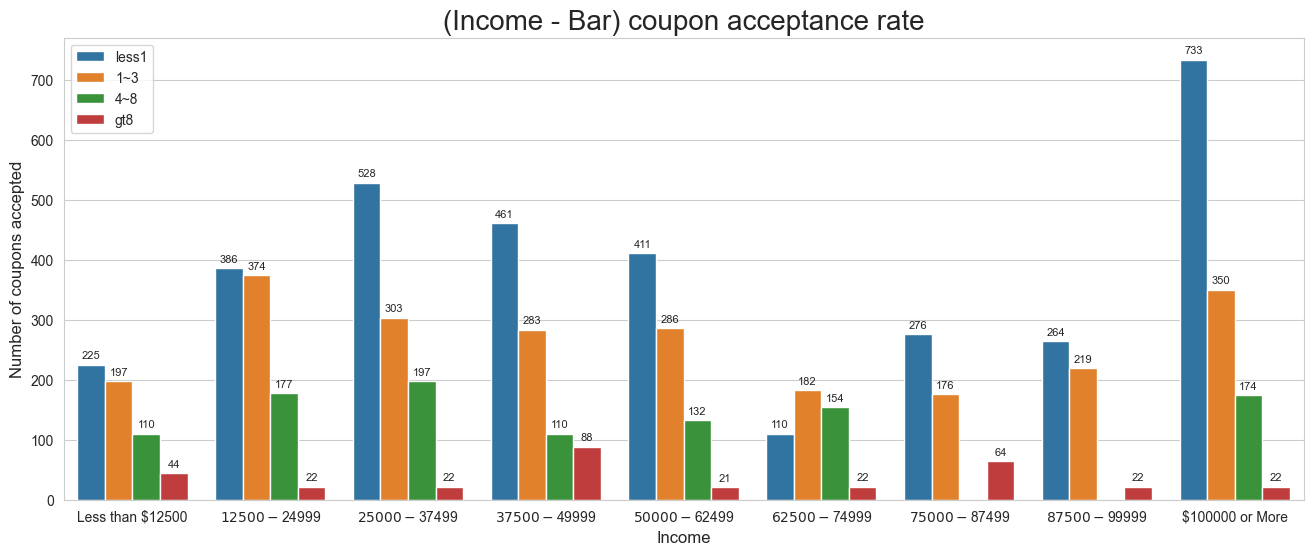

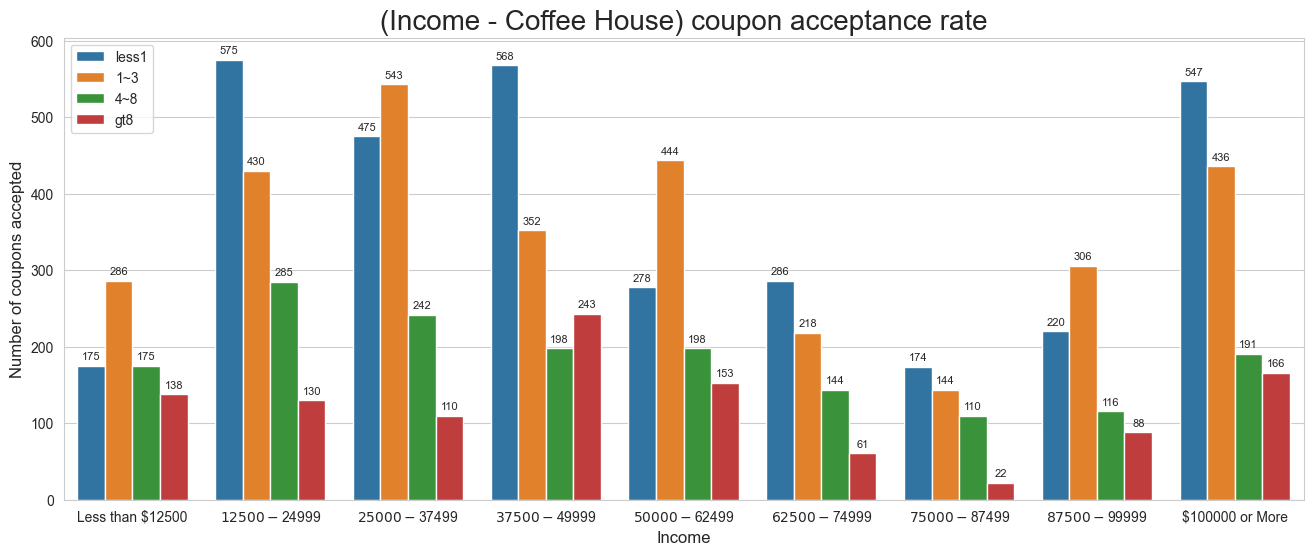

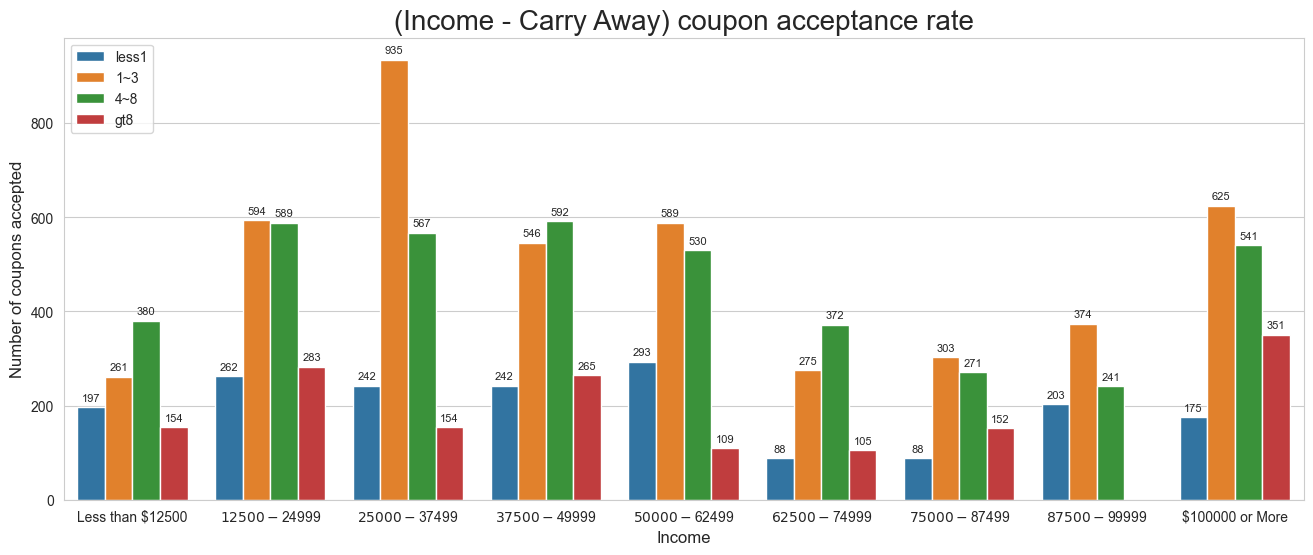

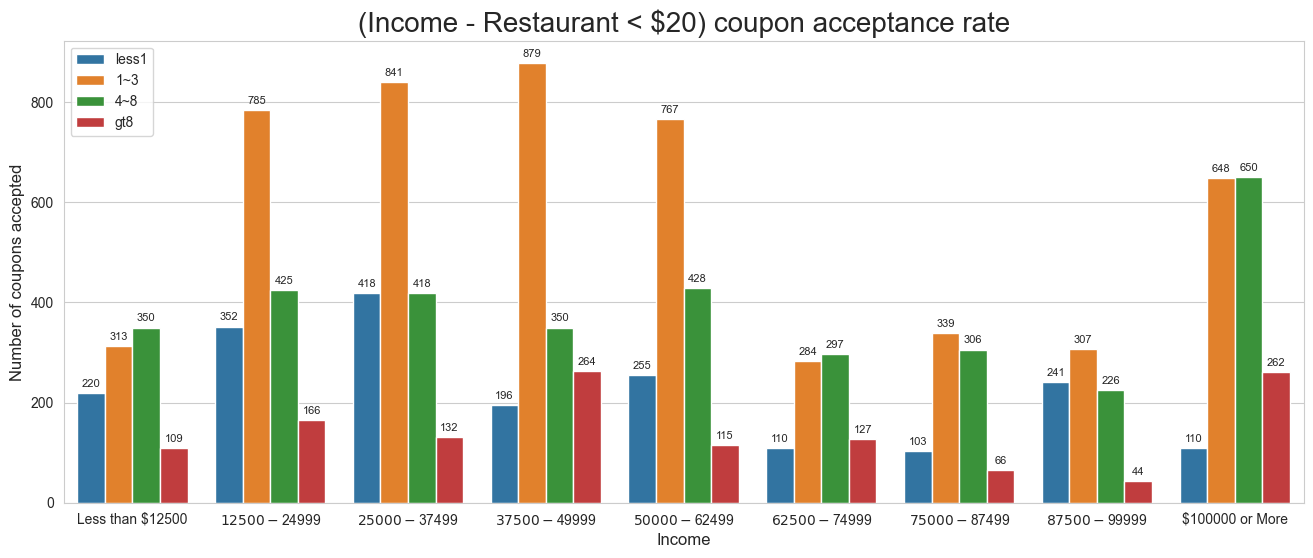

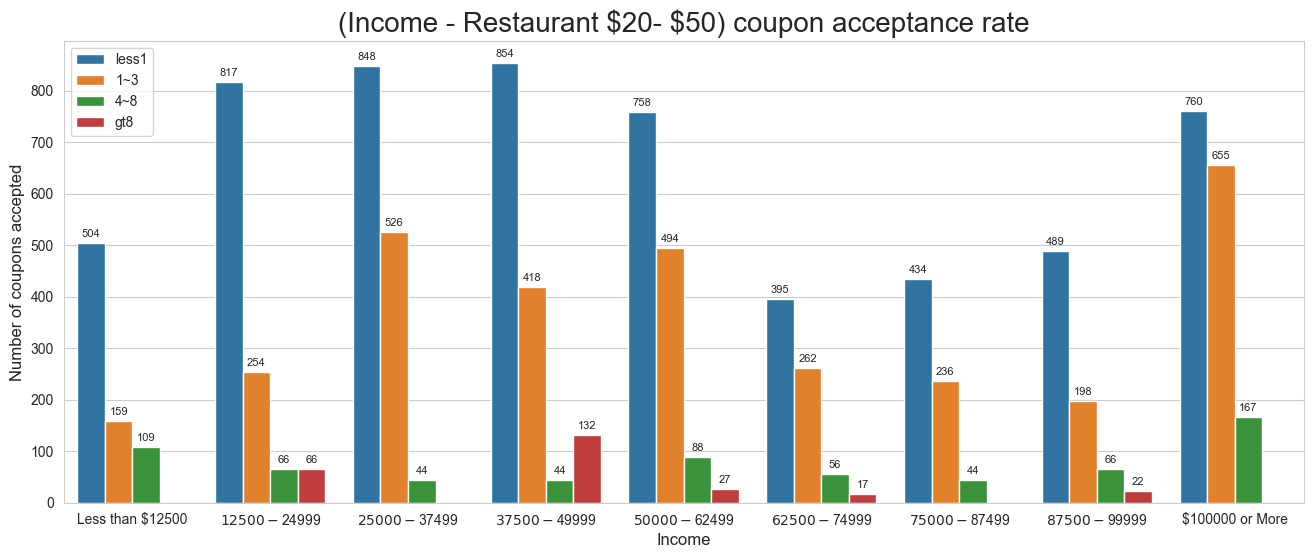

In [422]:
_coupons = [
    "Bar",
    "CoffeeHouse",
    "CarryAway",
    "RestaurantLessThan20",
    "Restaurant20To50",
]
_title = [
    "Bar",
    "Coffee House",
    "Carry Away",
    "Restaurant < \\$20",
    "Restaurant \\$20- \\$50",
]
_frequency = ["less1", "1~3", "4~8", "gt8"]
_order = [
    "Less than $12500",
    "$12500 - $24999",
    "$25000 - $37499",
    "$37500 - $49999",
    "$50000 - $62499",
    "$62500 - $74999",
    "$75000 - $87499",
    "$87500 - $99999",
    "$100000 or More",
]

for ctr, coupon in enumerate(_coupons):
    fig, ax = plt.subplots(figsize=(16, 6))
    eatery = (
        df[(df["coupon"] != "never")][[coupon, "income"]]
        .groupby([coupon, "income"])
        .size()
        .reset_index(name="count")
    )
    _dia = sns.barplot(
        eatery,
        x="income",
        y="count",
        hue=coupon,
        order=_order,
        hue_order=["less1", "1~3", "4~8", "gt8"],
    )
    for nbr in range(0, len(_frequency)):
        _dia.bar_label(_dia.containers[nbr], padding=3, fontsize=8)

    _dia.set_ylabel("Number of coupons accepted", fontsize=12)
    _dia.set_xlabel("Income", fontsize=12)
    _dia.set_title("(Income - " + _title[ctr] + ") coupon acceptance rate", fontsize=20)
    _dia.legend(loc="upper left", ncols=1)
    plt.tick_params(axis="x", rotation=0)
    plt.savefig("output/" + coupon + "_income_freq.png")
    plt.show()